In [1]:
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import HessianInversionWarning
import data_processing as dproc
import compare as comp
import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Branje in prikaz izvornih podatkov

smartinska_2019 : Var:  238459.32547736037  Mean:  655.9744597249509
J_2019 : Var:  3374586.2918214677  Mean:  3057.6684667309546


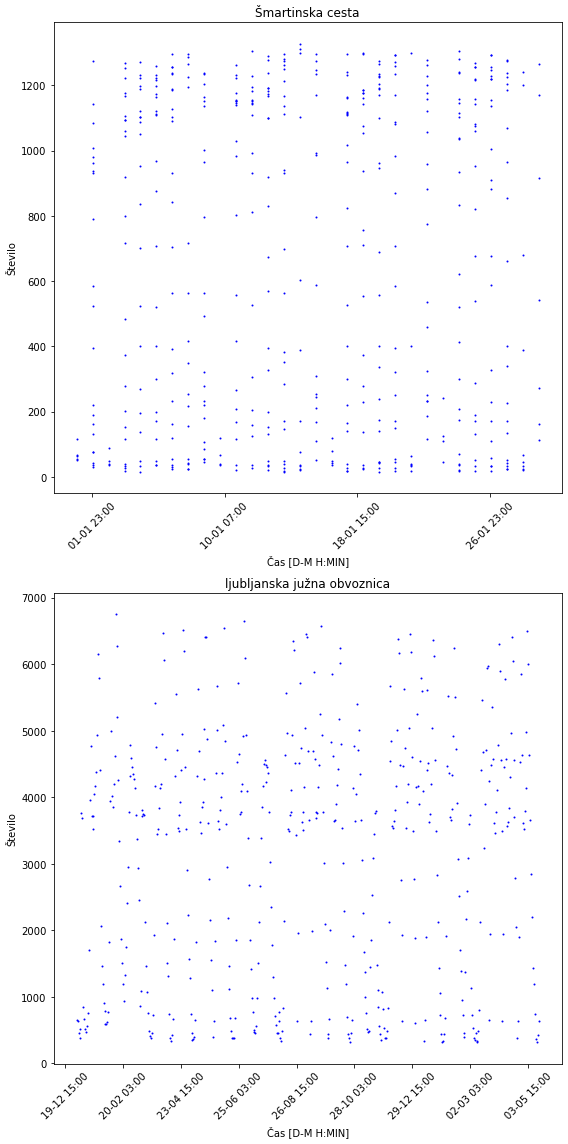

In [2]:
file_names = ['smartinska_2019','J_2019']
title_names = ['Šmartinska cesta','ljubljanska južna obvoznica']

dproc.plot_raw_data(file_names, title_names, [200,1500])

# Grajenje in iskanje najbolj ustreznega modela
Podatke očistimo s funkcijo clean_data(). Nato za posamezno podatkovno zbirko zgradimo več modelov in poiščemo najbolj ustreznega.
Za podatkovno zbriko južne ljubljanske obvoznice izvedemo tudi primerjave glede na:
* dan v tednu,
* vreme,
* tip vozil,
* razmere v povezavi s COVID-19. <br>
Celoten postopek grajenja in ocenjevanja modelov se ponovi za vsako primerjavo. Vsi generirani grafi in rezultati so shranjeni v mapi results.

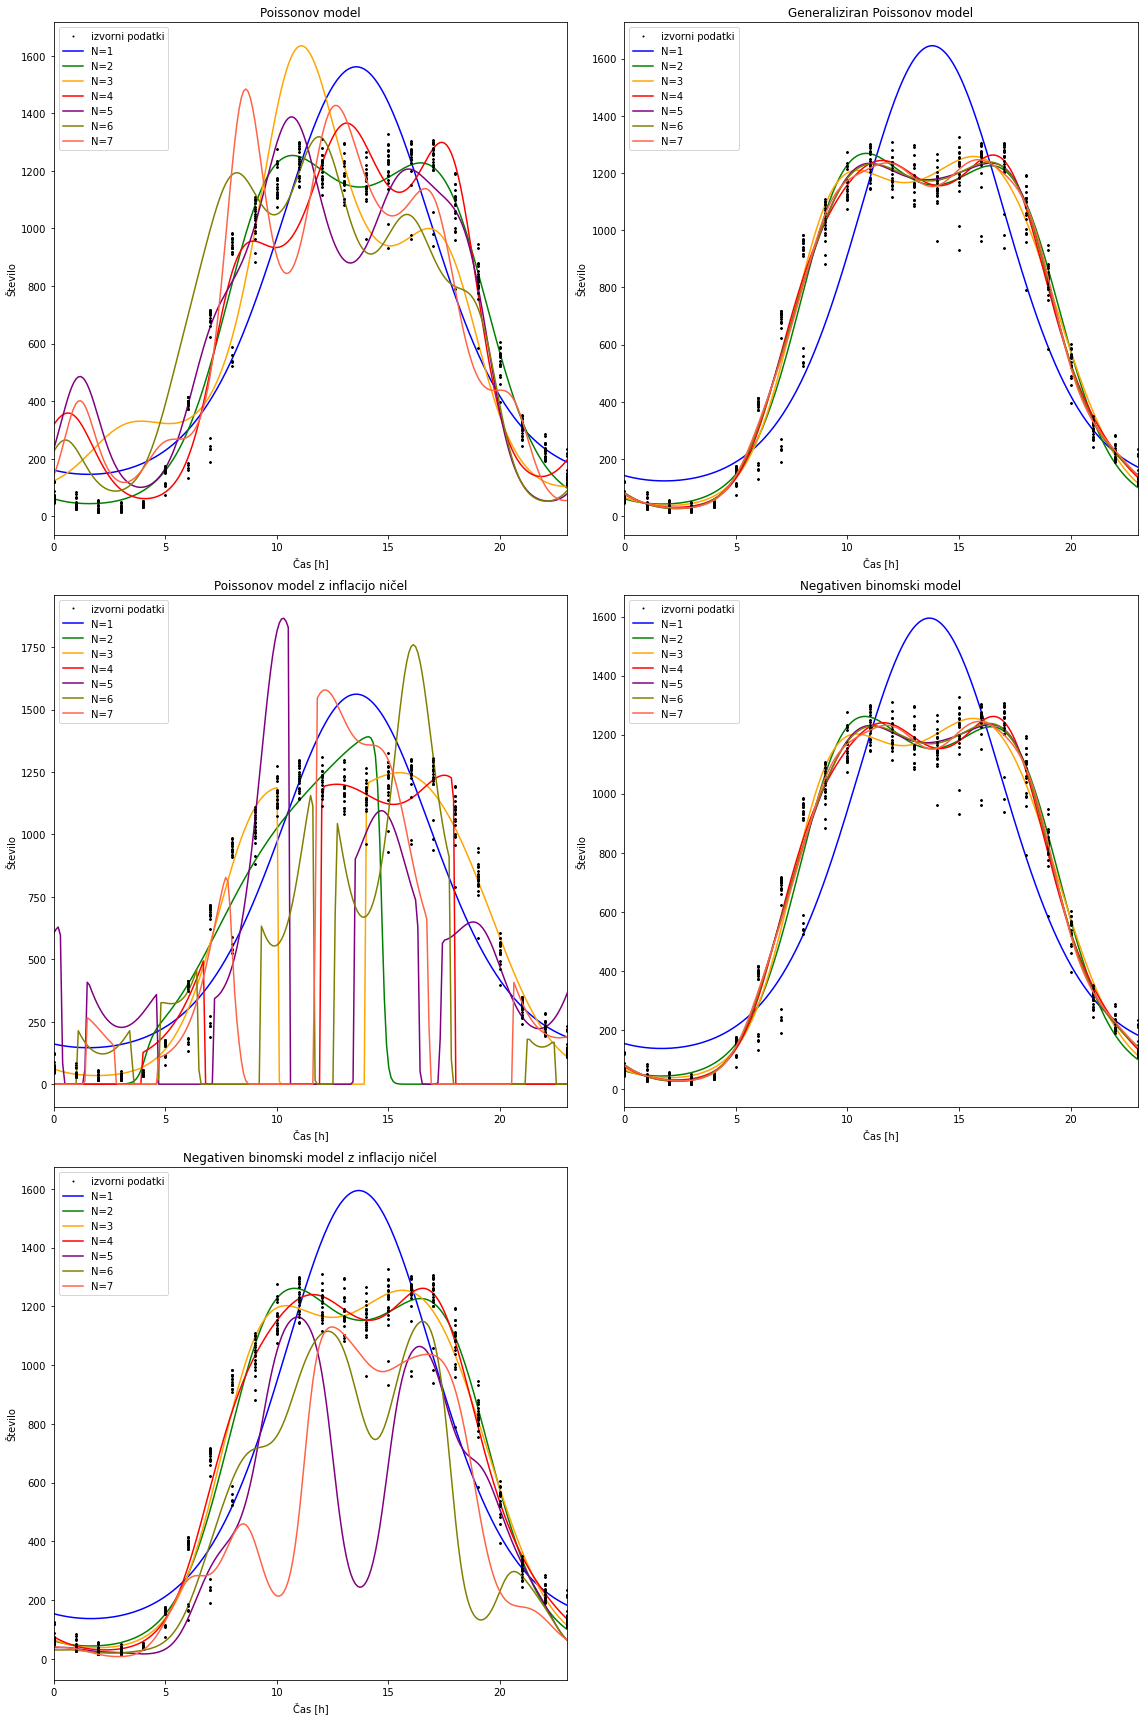

Najbolj ustrezen model za  smartinska_2019  je  gen_poisson 5.0  komponent


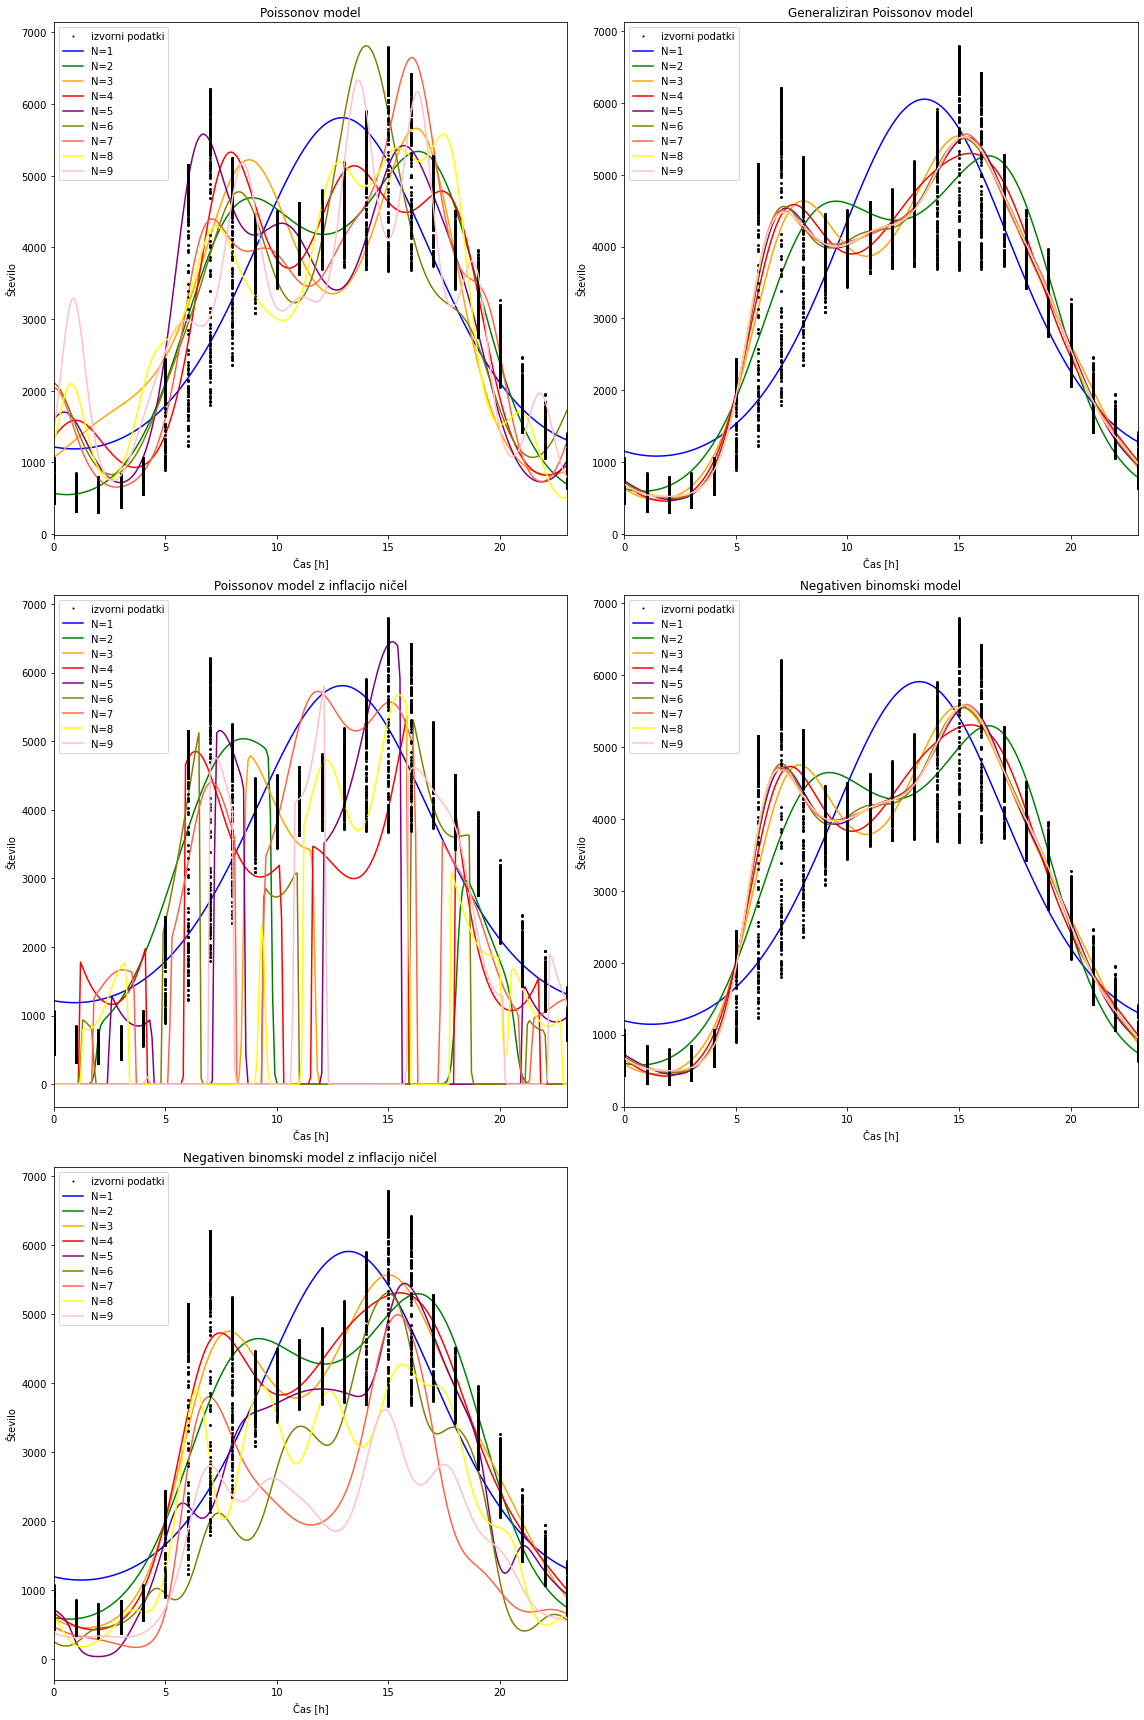

Najbolj ustrezen model za  J_2019  je  gen_poisson 7.0  komponent


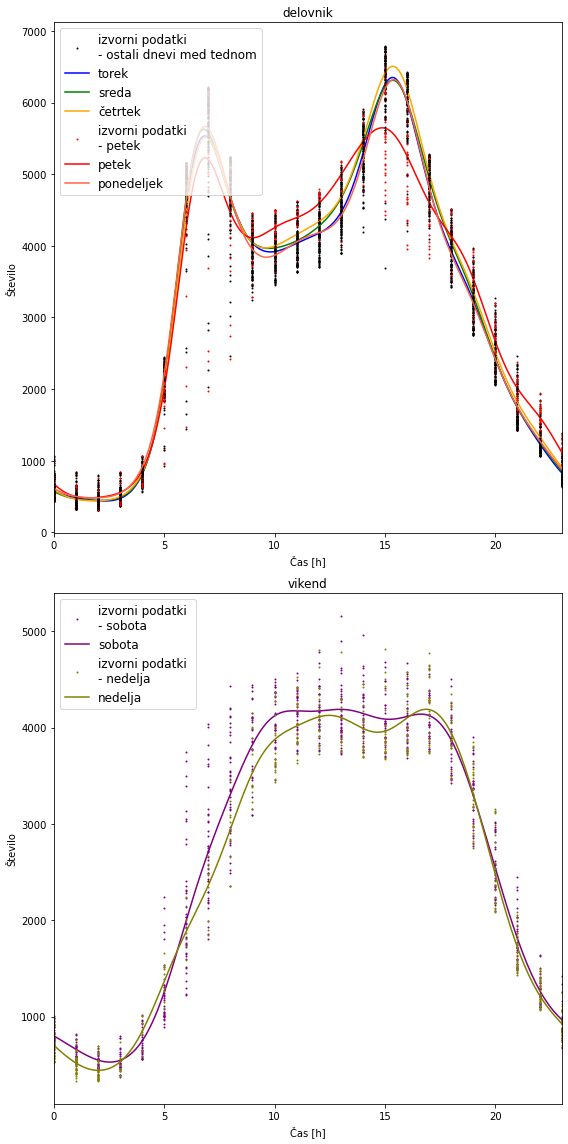

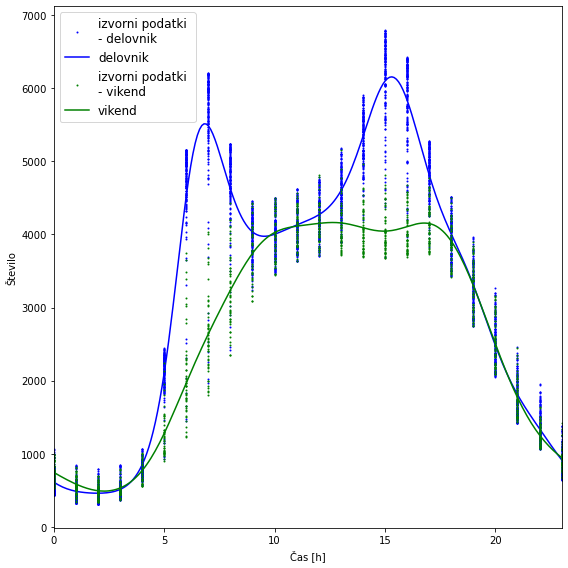

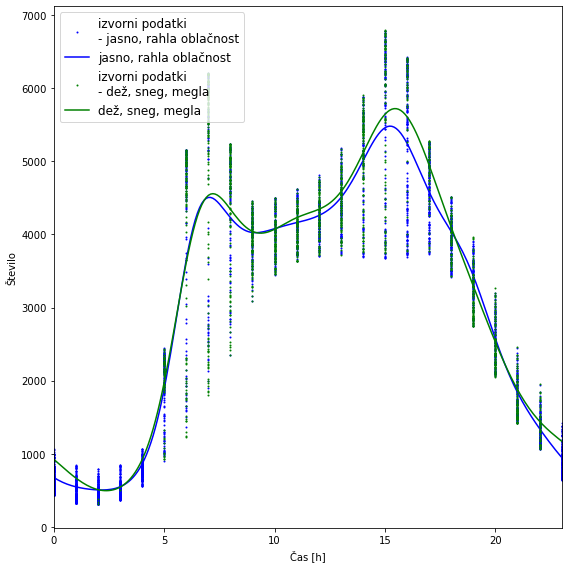

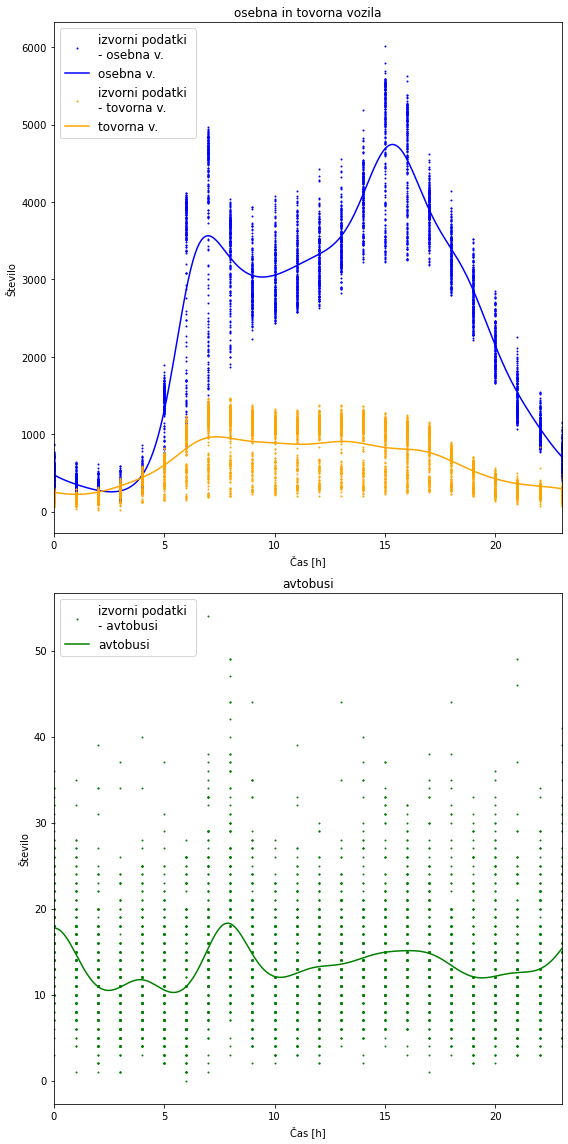

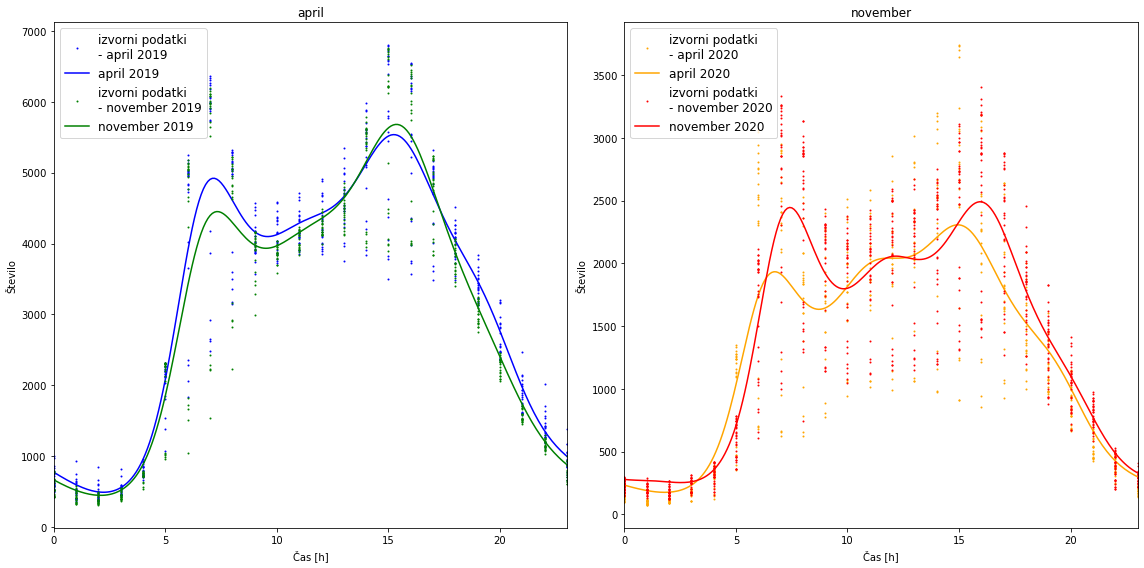

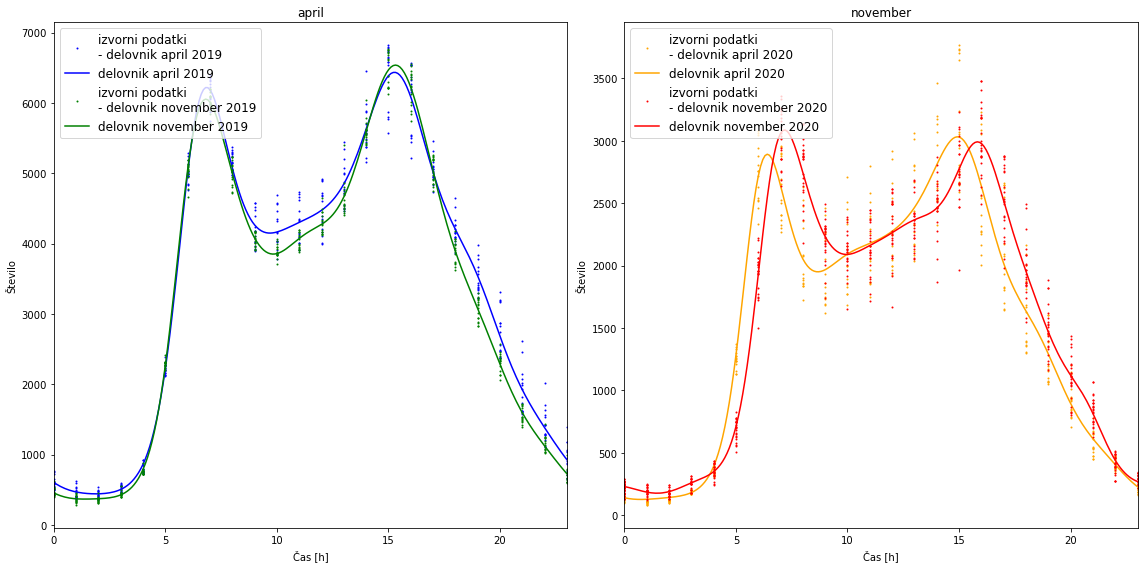

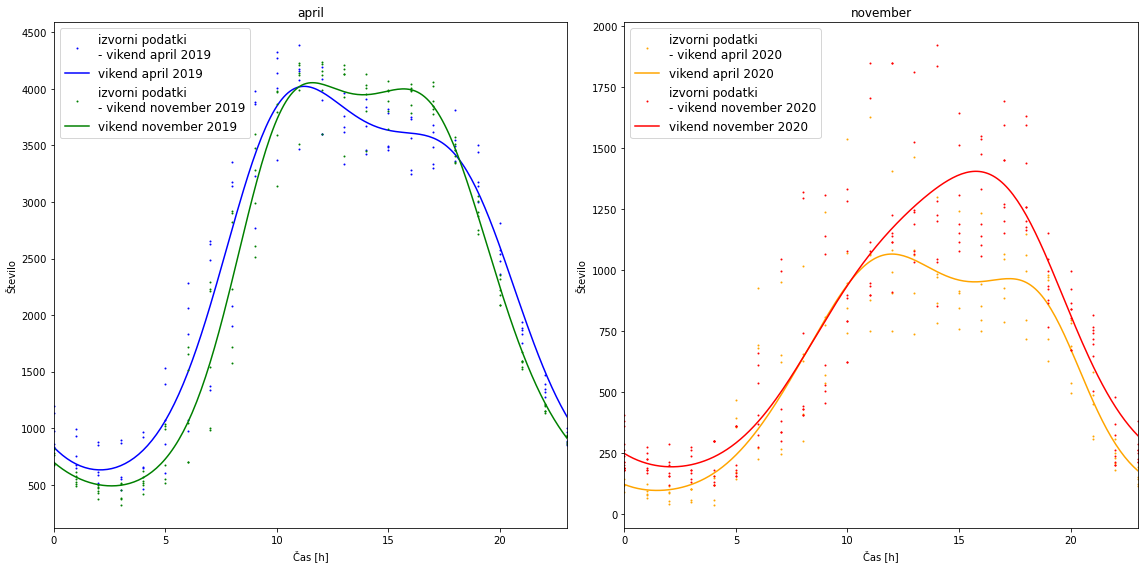

In [3]:
for file_name in file_names:

    df = pd.read_csv(r'data\/' + file_name + '.csv')
    models_type = ['poisson','gen_poisson','zero_poisson','nb','zero_nb']

    if file_name == 'smartinska_2019':
        n_components = [1, 2, 3, 4, 5, 6, 7]
        save_file_to = 'smartinska'
    else:
        n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        save_file_to = 'juzna'

    # clean data
    df = dproc.clean_data(df)

    # find the best model - fit to models
    df_best = dproc.find_best_model(df, models_type, n_components, plot=True, save_file_to=save_file_to)
    print("Najbolj ustrezen model za ", file_name," je ",df_best.model_type, df_best.n_components, " komponent")
    model_type = df_best.model_type
    n_components = df_best.n_components

    if file_name == 'J_2019':
        model_type1 = model_type
        n_components1 = int(n_components)

        # compare
        df_results=comp.compare_by_day()
        df_results = df_results[
        ['dan', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
         'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
        df_results.to_csv(r'results\dnevi.csv', index=False)

        df_results=comp.compare_by_weekend()
        df_results = df_results[
        ['vikend_delovnik', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
         'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
        df_results.to_csv(r'results\vikend.csv', index=False)

        df_results=comp.compare_by_weather()
        df_results = df_results[
        ['vreme', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
         'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
        df_results.to_csv(r'results\vreme.csv', index=False)

        df_results=comp.compare_by_type()
        df_results = df_results[
        ['tipi_vozil', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
         'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
        df_results.to_csv(r'results\tipi.csv', index=False)

        df_results=comp.compare_by_covid()
        ix=0
        names=['covid_all','covid_work','covid_week']
        for df_result in df_results:
            df_result = df_result[
                ['obdobje', 'model_type', 'n_components', 'amplitude', 'mesor', 'peaks', 'heights', 'amplitude_CIs',
                 'mesor_CIs', 'peaks_CIs', 'heights_CIs', 'AIC', 'BIC', 'log_likelihood', 'llr_pvalue']]
            df_result.to_csv(r'results\/' + names[ix]+'.csv', index=False)
            ix=ix+1
    else:
        model_type2 = model_type
        n_components2 = int(n_components)

# Najbolj ustrezen model za posamezno podatkovno zbirko
Prikaz najbolj ustreznih modelov in intervalov zaupanja.

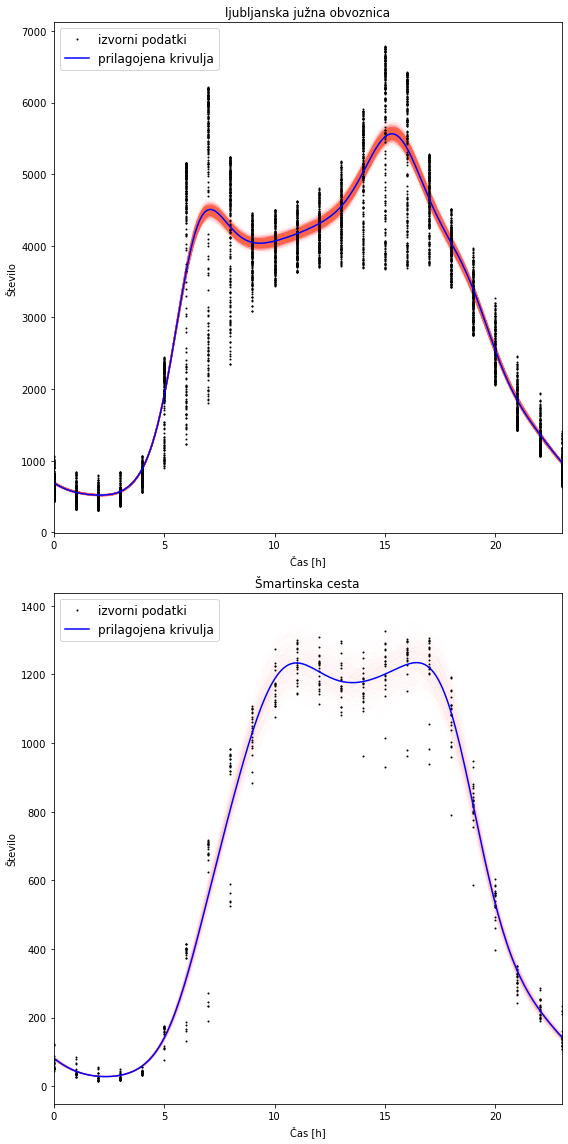

In [4]:
# plot best models and CIs
df1 = pd.read_csv(r'data/J_2019.csv')
df1 = dproc.clean_data(df1)
df2 = pd.read_csv(r'data/smartinska_2019.csv')
df2 = dproc.clean_data(df2)
dproc.plot_models([df1, df2], [model_type1, model_type2], [n_components1, n_components2],
                  title=['ljubljanska južna obvoznica', 'Šmartinska cesta'], cols=1, rows=2)